github：https://github.com/fchollet/deep-learning-with-python-notebooks

配置环境：keras 2.2.4（原文是2.0.8，运行结果一致），tensorflow-gpu 1.12.0，python 3.5.4，

主机：显卡：一块GTX850M；内存：12G（注：绝大部分代码不需要GPU）

In [76]:
import keras
keras.__version__

'2.2.4'

In [77]:
import tensorflow as tf
tf.__version__

'1.12.0'

## 2.1 初识神经网络

* 我们来看一个具体的神经网络示例，使用 Python 的 Keras 库来学习手写数字分类。

* 我们这里要解决的问题是，将**手写数字的灰度图像（28 像素×28 像素）划分到 10 个类别中（0~9）**。

* 我们将使用 MNIST 数据集，它是机器学习领域的一个经典数据集。这个数据集包含60 000 张训练图像和 10000 张测试图像。你可以将“解决”MNIST 问题看作深度学习的“Hello World”，正是用它来验证你的算法是否按预期运行。

### （1）下载数据集，读取数据集

这里国内会出现下载不下来，需要先自己下载下来`https://s3.amazonaws.com/img-datasets/mnist.npz`,
再放到`C:\Users\Administrator\.keras\datasets\`下即可

In [78]:
# 训练和测试
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

* train_images 和 train_labels 组成了训练集（training set），模型将从这些数据中进行学习。
* 然后在测试集（test set，即 test_images 和 test_labels）上对模型进行测试。
* X:图像被编码为 Numpy 数组，而y标签是数字数组，取值范围为 0~9。


In [79]:
print(train_images.shape)
print(train_labels.shape)
train_labels

(60000, 28, 28)
(60000,)


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [80]:
print(test_images.shape)
print(test_labels.shape)
test_labels

(10000, 28, 28)
(10000,)


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### （2）网络架构

In [81]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [82]:
from keras.utils.vis_utils import plot_model
plot_model(network,to_file='./img/02/network.png',show_shapes=True,show_layer_names=True)

神经网络的核心组件是层（layer），它是一种数据处理模块，你可以将它看成数据过滤器。 进去一些数据，出来的数据变得更加有用。具体来说，层从输入数据中提取表示——我们期望这种表示有助于解决手头的问题。

* 第一层网络包含 2 个 Dense 层，它们是密集连接（也叫全连接）的神经层。
* 第二层（也 是最后一层）是一个 10 路 softmax 层，它将返回一个由 10 个概率值（总和为 1）组成的数组。每个概率值表示当前数字图像属于 10 个数字类别中某一个的概率。

要想训练网络，我们还需要选择编译（compile）步骤的三个参数。

* **损失函数（loss function）：网络如何衡量在训练数据上的性能，即网络如何朝着正确的方向前进。**

* **优化器（optimizer）：基于训练数据和损失函数来更新网络的机制。**

* **在训练和测试过程中需要监控的指标（metric）：本例只关心精度，即正确分类的图像所占的比例。**

### （3）编译步骤

In [83]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

### （4）准备X图像数据
在开始训练之前，我们将对数据进行预处理，将其变换为网络要求的形状，并缩放到所有值都在 [0, 1] 区间。之前训练图像保存在一个uint8类型的数组中，其形状为 (60000, 28 , 28)，取值区间为 [0, 255]。我们需要将其变换为一个float32数组，其形状为 (60000, 28 * 28)，取值范围为 0~1。

In [84]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

### （5）准备Y标签，对标签进行分类编码

In [85]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### （6）训练数据
现在我们准备开始训练网络，在 Keras 中这一步是通过调用网络的 fit 方法

In [86]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 5s 77us/step - loss: 0.2572 - acc: 0.9260
Epoch 2/5
60000/60000 [==============================] - 4s 71us/step - loss: 0.1036 - acc: 0.9698
Epoch 3/5
60000/60000 [==============================] - 4s 72us/step - loss: 0.0691 - acc: 0.9792
Epoch 4/5
60000/60000 [==============================] - 4s 71us/step - loss: 0.0494 - acc: 0.9856: 0s - loss: 0.048
Epoch 5/5
60000/60000 [==============================] - 4s 70us/step - loss: 0.0375 - acc: 0.9887


训练过程中显示了两个数字：

* 一个是网络在训练数据上的损失（loss），

* 另一个是网络在训练数据上的精度（acc）。

我们很快就在训练数据上达到了 0.989（98.9%）的精度。现在我们来检查一下模型在测试集上的性能。

In [87]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 95us/step


In [88]:
print('test_acc:', test_acc)

test_acc: 0.9809


测试集精度为 97.92%，比训练集精度低不少。训练精度和测试精度之间的这种差距是过拟合（overfit）造成的。过拟合是指机器学习模型在新数据上的性能往往比在训练数据上要差，它 是第 3 章的核心主题。

第一个例子到这里就结束了。你刚刚看到了如何构建和训练一个神经网络，用不到 20 行的 Python 代码对手写数字进行分类。下一章会详细介绍这个例子中的每一个步骤，并讲解其背后的原理。接下来你将要学到张量（输入网络的数据存储对象）、张量运算（层的组成要素）和梯度下降（可以让网络从训练样本中进行学习）。

## 2.2 神经网络的数据表示

前面数据存储在多维 Numpy 数组中，也叫张量（tensor）。张量这一概念的核心在于，它是一个数据容器。它包含的数据几乎总是数值数据，因此它是数字的容器。你可能对矩阵很熟悉，它是二维张量。张量是矩阵向任意维度的推广［注意，**张量的维度（dimension）通常叫作轴（axis）**］。

### 2.2.1 标量（0D 张量）

* 仅包含一个数字的张量叫作标量（scalar，也叫标量张量、零维张量、 0D 张量）。

* 在 Numpy中，一个 float32 或 float64 的数字就是一个标量张量（或标量数组）。

* 可以用 ndim 属性来查看一个 Numpy 张量的轴的个数。

* 标量张量有 0 个轴（ndim == 0）。张量轴的个数也叫作阶（rank）。

In [89]:
import numpy as np
x = np.array(12)
print(x)
print(x.dtype)
print(x.ndim)
print(x.shape)

12
int32
0
()


### 2.2.2 向量（1D 张量）

数字组成的数组叫作向量（vector）或一维张量（1D 张量）。一维张量只有一个轴。

In [90]:
x = np.array([12, 3., 6, 14, 7])
print(x)
print(x.dtype)
print(x.ndim)
print(x.shape)

[12.  3.  6. 14.  7.]
float64
1
(5,)


### 2.2.3 矩阵（2D 张量）

* 向量组成的数组叫作矩阵（matrix）或二维张量（2D 张量）。

* 矩阵有 2 个轴（通常叫作行和列）。

* 第一个轴上的元素叫作行（row），第二个轴上的元素叫作列（column）。

* 在下面的例子中，`[5, 78, 2, 34, 0]`是x的第一行， `[5, 6, 7]`是第一列。

In [91]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
print(x)
print(x.dtype)
print(x.ndim)
print(x.shape)

[[ 5 78  2 34  0]
 [ 6 79  3 35  1]
 [ 7 80  4 36  2]]
int32
2
(3, 5)


### 2.2.4 3D 张量与更高维张量

将多个矩阵组合成一个新的数组，可以得到一个 3D 张量。

In [92]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4., 36, 2]]])
print(x)
print(x.dtype)
print(x.ndim)
print(x.shape)

[[[ 5. 78.  2. 34.  0.]
  [ 6. 79.  3. 35.  1.]
  [ 7. 80.  4. 36.  2.]]

 [[ 5. 78.  2. 34.  0.]
  [ 6. 79.  3. 35.  1.]
  [ 7. 80.  4. 36.  2.]]

 [[ 5. 78.  2. 34.  0.]
  [ 6. 79.  3. 35.  1.]
  [ 7. 80.  4. 36.  2.]]]
float64
3
(3, 3, 5)


* 将多个`3D`张量组合成一个数组，可以创建一个`4D`张量，以此类推。

* 深度学习处理的一般是`0D`到`4D`的张量，但处理视频数据时可能会遇到`5D`张量。

### 2.2.5 关键属性

张量是由以下三个关键属性来定义的。

* 轴的个数（阶）`ndim`。例如， 3D 张量有 3 个轴，矩阵有 2 个轴。这在 Numpy 等 Python 库中也叫张量的 ndim。

* 形状`shape`。这是一个整数元组，表示张量沿每个轴的维度大小（元素个数）。例如，前面矩阵示例的形状为 (3, 5)， 3D 张量示例的形状为 (3, 3, 5)。向量的形状只包含一个元素，比如 (5,)，而标量的形状为空，即 ()。

* 数据类型（在 Python 库中通常叫作 `dtype`）。这是张量中所包含数据的类型，例如，张量的类型可以是 `float32`、 `uint8`、 `float64`等。在极少数情况下，你可能会遇到字符（`char`）张量。注意， Numpy（以及大多数其他库）中不存在字符串张量，因为**张量存储在预先分配的连续内存段中，而字符串的长度是可变的，无法用这种方式存储。**

这里 `train_images` 是一个由 8 位整数组成的 3D 张量。更确切地说，它是 60000个矩阵组成的数组，每个矩阵由 `28×28` 个整数组成。每个这样的矩阵都是一张灰度图像，元素取值范围为 `0~255`。

In [93]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.ndim)
print(train_labels.ndim)
print(train_images.ndim)
print(train_labels.ndim)

print(train_images.shape)
print(train_labels.shape)
print(train_images.shape)
print(train_labels.shape)

print(train_images.dtype)
print(train_labels.dtype)
print(train_images.dtype)
print(train_labels.dtype)

3
1
3
1
(60000, 28, 28)
(60000,)
(60000, 28, 28)
(60000,)
uint8
uint8
uint8
uint8


In [94]:
# （训练、验证和测试）
# from tensorflow.examples.tutorials.mnist import input_data
# mnist = input_data.read_data_sets('./mnist/', one_hot=True)

# 读取一张 mnist.train.images 里的图片
# %matplotlib inline
# import matplotlib.pyplot as plt
# import numpy as np
# temp = mnist.train.images[4]
# img=np.reshape(temp, (28, 28))
# plt.imshow(img,cmap='gray')
# plt.show()

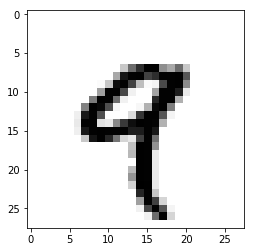

In [95]:
# 读取一张train_images里的图片
%matplotlib inline
digit = train_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

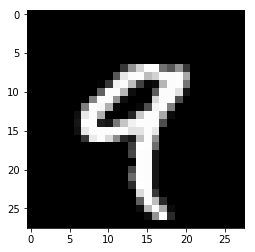

In [96]:
plt.imshow(digit, cmap='gray')
plt.show()

### 2.2.6 在Numpy中操作张量

使用语法 `train_images[i]` 来选择沿着第一个轴的特定数字。选择张量的特定元素叫作张量切片（`tensor slicing`）。

In [99]:
train_images[4]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [100]:
# 选择第 10~100 个数字（不包括第 100 个），并将其放在形状为 (90, 28,28) 的数组中
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [101]:
# 切片沿着每个张量轴的起始索引和结束索引。注意， : 等同于选择整个轴。
my_slice = train_images[10:100, :, :]
print(my_slice.shape)

my_slice = train_images[10:100, 0:28, 0:28]
print(my_slice.shape)

(90, 28, 28)
(90, 28, 28)


一般来说，你可以沿着每个张量轴在任意两个索引之间进行选择。

例如，你可以在所有图像的右下角选出 14 像素×14 像素的区域。

In [103]:
my_slice = train_images[:, 14:, 14:]
print(my_slice.shape)

(60000, 14, 14)


### 2.2.7 数据批量

* 通常来说，深度学习中所有数据张量的第一个轴（0 轴，因为索引从 0 开始）都是样本轴（samples axis，有时也叫样本维度）。在 MNIST 的例子中，样本就是数字图像。

* 此外，深度学习模型不会同时处理整个数据集，而是将数据拆分成小批量。具体来看，下面是 MNIST 数据集的一个批量，批量大小为 128。

```
batch = train_images[:128]

batch = train_images[128:256]
...
batch = train_images[128 * n:128 * (n + 1)]
```

* 对于这种批量张量，第一个轴（0 轴）叫作批量轴（batch axis）或批量维度（batch dimension）。

### 2.2.8 现实世界中的数据张量

你需要处理的数据几乎总是以下类别之一。
* 向量数据： 2D 张量，形状为 `(samples, features)`。
* 时间序列数据或序列数据： 3D 张量，形状为 `(samples, timesteps, features)`。
* 图像： 4D 张量，形状为 `(samples, height, width, channels)` 或 `(samples, channels,height, width)`。
* 视频： 5D 张量，形状为 `(samples, frames, height, width, channels)` 或 `(samples,frames, channels, height, width)`。

#### （1）向量数据

最常见的数据。对于这种数据集，每个数据点都被编码为一个向量，因此一个数据批量就被编码为 2D 张量（即向量组成的数组），其中第一个轴是样本轴，第二个轴是特征轴。

#### （2）时间序列数据或序列数据

当时间（或序列顺序）对于数据很重要时，应该将数据存储在带有时间轴的 3D 张量中。每个样本可以被编码为一个向量序列（即 2D 张量），因此一个数据批量就被编码为一个 3D 张量。

![image.png](../img/02/时间序列数据.png)

根据惯例，时间轴始终是第 2 个轴（索引为 1 的轴）。我们来看几个例子。

* 股票价格数据集。每一分钟，我们将股票的当前价格、前一分钟的最高价格和前一分钟的最低价格保存下来。因此每分钟被编码为一个 3D 向量，整个交易日被编码为一个形状为 (390, 3) 的 2D 张量（一个交易日有 390 分钟），而 250 天的数据则可以保存在一个形状为 (250, 390, 3) 的 3D 张量中。这里每个样本是一天的股票数据。

* 推文数据集。我们将每条推文编码为 280 个字符组成的序列，而每个字符又来自于 128个字符组成的字母表。在这种情况下，每个字符可以被编码为大小为 128 的二进制向量（只有在该字符对应的索引位置取值为 1，其他元素都为 0）。那么每条推文可以被编码为一个形状为 (280, 128) 的 2D 张量，而包含 100 万条推文的数据集则可以存储在一个形状为 (1000000, 280, 128) 的张量中。

#### （3）图像数据

图像通常具有三个维度：高度、宽度和颜色深度。虽然灰度图像（比如 MNIST 数字图像）只有一个颜色通道，因此可以保存在 2D 张量中，但按照惯例，图像张量始终都是 3D 张量，灰度图像的彩色通道只有一维。因此，如果图像大小为 256×256，那么 128 张灰度图像组成的批量可以保存在一个形状为 (128, 256, 256, 1) 的张量中，而 128 张彩色图像组成的批量则可以保存在一个形状为 (128, 256, 256, 3) 的张量中。
![image.png](../img/02/图像数据.png)

图像张量的形状有两种约定： 
* 通道在后（channels-last）的约定（在 TensorFlow 中使用）
* 通道在前（channels-first）的约定（在 Theano 中使用）
* TensorFlow 机器学习框架将颜色深度轴放在最后： `(samples, height, width, color_depth)`
* Theano将图像深度轴放在批量轴之后： `(samples, color_depth, height, width)`
* Keras 框架同时支持这两种格式
    * TensorFlow作为后端形式：`C:\Users\Administrator\.keras\keras.json`
    ```json
    {
    "epsilon": 1e-07,
    "floatx": "float32",
    "backend": "tensorflow",
    "image_data_format": "channels_last"
    }
    ```

#### （4）视频数据

* 视频数据是现实生活中需要用到 5D 张量的少数数据类型之一。
* 视频可以看作`一系列帧`，`每一帧`都是`一张彩色图像`。
* 由于`每一帧`都可以保存在一个形状为 `(height, width, color_depth)` 的 3D 张量中，因此`一系列帧`可以保存在一个形状为 `(frames, height, width,color_depth)` 的 4D 张量中，而`不同视频组成的批量`则可以保存在一个 5D 张量中，其形状为`(samples, frames, height, width, color_depth)`。

* 一个以`每秒 4 帧`采样的 `60 秒` YouTube 视频片段，视频尺寸为 `144×256`，这个视频共有 `240 帧`。 `4 个这样的视频片段`组成的批量将保存在形状为 `(4, 240, 144, 256, 3)`的张量中。总共有`106168320个`值。
* 如果张量的数据类型（`dtype`）是 `float32`，每个值都是`32`位，那么这个张量共有`405MB`。好大！你在现实生活中遇到的视频要小得多，因为它们不以`float32`格式存储，而且通常被大大压缩，比如`MPEG`格式。

## 2.3 神经网络的“齿轮”：张量运算

所有计算机程序最终都可以简化为二进制输入上的一些二进制运算（AND、 OR、 NOR 等），与此类似，深度神经网络学到的所有变换也都可以简化为数值数据张量上的一些张量运算（tensor operation），例如加上张量、乘以张量等。

**例如:**

我们通过叠加 Dense 层来构建网络。
```
keras.layers.Dense(512, activation='relu')
```
这个层可以理解为一个函数，输入一个 2D 张量，返回另一个 2D 张量，即输入张量的新表示。具体而言，这个函数如下所示（其中 W 是一个 2D 张量， b 是一个向量，二者都是该层的属性）。
```
output = relu(dot(W, input) + b)
```
这里有三个张量运算：
* 输入张量和张量W之间的点积运算（dot）、
* 得到的 2D 张量与向量 b 之间的加法运算（+）、
* 最后的 relu 运算(relu(x) 是 max(x, 0))

### 2.3.1 逐元素运算

* `relu`运算和加法都是`逐元素（element-wise）`的运算，即该运算`独立地应用于张量中的每个元素`，也就是说，这些运算非常适合大规模并行实现（向量化实现）。

![image.png](../img/02/逐元素运算.png)

* 在实践中处理 Numpy 数组时，这些运算都是优化好的 Numpy 内置函数

```python
import numpy as np
z = x + y
z = np.maximum(z, 0.)
```

### 2.3.2 广播

如果将两个形状不同的张量相加，会发生什么？
**如果没有歧义的话，较小的张量会被广播（broadcast），以匹配较大张量的形状。**

广播包含：

* (1) 向较小的张量添加轴（叫作广播轴），使其 ndim 与较大的张量相同。

* (2) 将较小的张量沿着新轴重复，使其形状与较大的张量相同。

```python
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x
```
```python
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)
```

### 2.3.3 张量点积

* 在 `Numpy`、 `Keras`、`TensorFlow`中，都是用 `*` 实现逐元素乘积。

* `TensorFlow`中的点积使用了不同的语法，但在 `Numpy`和`Keras`中，都是用标准的`dot`运算符来实现点积。

```python
import numpy as np
z = np.dot(x, y)
```

```python
# 两个向量 x 和 y 的点积
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z
```
> 注意，两个向量之间的点积是一个标量，而且只有元素个数相同的向量之间才能做点积。

```python
# 对一个矩阵 x 和一个向量 y 做点积，返回值是一个向量，其中每个元素是 y 和 x的每一行之间的点积
import numpy as np
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z
```

```python
# 矩阵 - 向量点积与向量点积之间的关系
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z
```
> 注意，如果两个张量中有一个的 ndim 大于 1，那么 dot 运算就不再是对称的，也就是说，dot(x, y) 不等于 dot(y, x)。

点积可以推广到具有任意个轴的张量。最常见的应用可能就是**两个矩阵之间的点积**。对于两个矩阵 `x` 和 `y`，当且仅当 `x.shape[1] == y.shape[0]`时，你才可以对它们做点积（`dot(x, y)`）。得到的结果是一个形状为 `(x.shape[0], y.shape[1])`的矩阵，其元素为`x`的行与`y`的列之间的点积。

```python
# 两个矩阵之间的点积
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z
```

![image.png](../img/02/图解矩阵点积.png)



### 2.3.4 张量变形

图像数据输入神经网络之前，我们在预处理时用到了这个运算。

```python
train_images = train_images.reshape((60000, 28 * 28))
```
一种特殊的张量变形是转置（`transposition`）。对矩阵做转置是指将行和列互换，使 `x[i, :]` 变为 `x[:, i]`

```python
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape
(20, 300)
```

### 2.3.5 张量运算的几何解释

数学，线性代数中：向量加法


### 2.3.6 深度学习的几何解释

神经网络完全由一系列张量运算组成，而这些**张量运算都只是输入数据的几何变换**。因此，你可以**将神经网络解释为高维空间中非常复杂的几何变换，这种变换可以通过许多简单的步骤来实现**。

**非常形象的比喻**
* 对于三维的情况，下面这个思维图像是很有用的。想象有两张彩纸：**一张红色，一张蓝色**

* 将其中一张纸放在另一张上。现在将两张纸一起揉成小球。**这个皱巴巴的纸球就是你的输入数据**，**每张纸对应于分类问题中的一个类别**。神经网络（或者任何机器学习模型）要做的就是**找到可以让纸球恢复平整的变换，从而能够再次让两个类别明确可分**。通过深度学习，这一过程可以用三维空间中一系列简单的变换来实现，比如你用手指对纸球做的变换，每次做一个动作。

![image.png](../img/02/解开复杂的数据流形.png)

* 让纸球恢复平整就是机器学习的内容：**为复杂的、高度折叠的数据流形找到简洁的表示**。现在你应该能够很好地理解，为什么深度学习特别擅长这一点：**它将复杂的几何变换逐步分解为一长串基本的几何变换，这与人类展开纸球所采取的策略大致相同**。深度网络的每一层都通过变换使数据解开一点点——许多层堆叠在一起，可以实现非常复杂的解开过程。

## 2.4 神经网络的“引擎”：基于梯度的优化

沿着梯度的反方向更新权重，损失每次都会变小一点。
* (1) 抽取训练样本 `x` 和对应目标 `y` 组成的数据批量。
* (2) 在 x 上运行网络，得到预测值 `y_pred`。
* (3) 计算网络在这批数据上的损失，用于衡量 `y_pred` 和 `y` 之间的距离。
* (4) 计算损失相对于网络参数的梯度［一次反向传播（`backward pass`）］。
* (5) 将参数沿着梯度的反方向移动一点，比如 `W -= step * gradient`，从而使这批数据上的损失减小一点。

**小批量随机梯度下降（`mini-batch stochastic gradient descent`**，又称为**小批量SGD**）。随机（`stochastic`）是指每批数据都是随机抽取的。下图给出了一维的情况，网络只有一个参数，并且只有一个训练样本。

![image.png](../img/02/一维参数空间中的梯度下降.png)

* 为`step`因子选取合适的值是很重要的。如果取值太小，则沿着曲线的下降需要很多次迭代，而且可能会陷入局部极小点。如果取值太大，则更新权重值之后可能会出现在曲线上完全随机的位置。
* **小批量SGD算法**的一个变体是**每次迭代时只抽取一个样本和目标，而不是抽取一批数据**。 这叫作**真SGD（有别于小批量 SGD）**。还有另一种极端，**每一次迭代都在所有数据上运行，这叫作批量SGD**。这样做的话，每次更新都更加准确，但计算代价也高得多。这两个极端之间的有效折中则是选择合理的批量大小。
* 上图是一维参数空间中的梯度下降，但在实践中需要在**高维空间中使用梯度下降**。神经网络的每一个权重参数都是空间中的一个自由维度，网络中可能包含数万个甚至上百万个参数维度。为了让你对损失曲面有更直观的认识，你还可以将梯度下降沿着二维损失曲面可视化。但你不可能将神经网络的实际训练过程可视化，因为你无法用人类可以理解的方式来可视化`1000000`维空间。

![image.png](../img/02/二维参数空间中的梯度下降.png)

* SGD还有多种变体，其区别**在于计算下一次权重更新时还要考虑上一次权重更新，而不是仅仅考虑当前梯度值**，比如**带动量的SGD、 Adagrad、 RMSProp 等变体**。这些变体被称为**优化方法（optimization method）或优化器（optimizer）**。其中**动量的概念**尤其值得关注，它在许多变体中都有应用。

* **动量解决了 SGD 的两个问题：收敛速度和局部极小点**。

![image.png](../img/02/局部极小点和全局最小点.png)

* 在某个参数值附近，有一个**局部极小点（local minimum）**：在这个点附近，向左移动和向右移动都会导致损失值增大。如果使用小学习率的`SGD`进行优化，那么优化过程可能会陷入局部极小点，导致无法找到全局最小点。

* 使用动量方法可以避免这样的问题，这一方法的灵感来源于物理学。将**优化过程想象成一个小球从损失函数曲线上滚下来**。**如果小球的动量足够大，那么它不会卡在峡谷里，最终会到达全局最小点**。动量方法的实现过程是**每一步都移动小球，不仅要考虑当前的斜率值（当前的加速度），还要考虑当前的速度（来自于之前的加速度）**。这在实践中的是指，更新参数 `w` 不仅要考虑当前的梯度值，还要考虑上一次的参数更新。